<a href="https://www.kaggle.com/code/piya12345/loan-approval-prediction?scriptVersionId=287228610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> # **Introduction**
>
> Loan approval is an important process in the banking and financial sector. Banks receive a large number of loan applications daily, and manually evaluating each application can be time-consuming and inconsistent.
This project aims to build a machine learning-based system that predicts whether a loan application will be approved or rejected based on applicant details and loan-related features.

> # **Problem Statement**
>
> To predict loan approval status (Approved / Not Approved) using historical loan application data and machine learning algorithms.

> # **Dataset Description**
> 
> The dataset contains applicant and loan-related information such as:
> 
> * Gender
> * Marital Status
> * Number of Dependents
> * Education
> * Self Employment Status
> * Applicant Income
> * Co-applicant Income
> * Loan Amount
> * Loan Amount Term
> * Credit History
> * Property Area
> * Loan Status (Target Variable)


> ## Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter

#libraries for visalization
import matplotlib.pyplot as plt
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#libraries for ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#warning hadle
warnings.filterwarnings("ignore")

> ##  importing csv file

In [2]:

path = "/kaggle/input/loan-approval-prediction-dataset/original_dataset.csv"
df = pd.read_csv(path)

In [3]:
print("View of dataset:\n\n", df.head())


View of dataset:

     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2

Size of dataset

In [4]:
print(f"row, column : {df.shape}")

row, column : (614, 13)


> ## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"row, column: {df.shape}")

row, column: (614, 12)


> ## Missing values

In [8]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
for col in null_cols:
    print(df[col].groupby(df[col]).count(),"\n", "-"*50)

Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64 
 --------------------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64 
 --------------------------------------------------
LoanAmount
9.0      1
17.0     1
25.0     2
26.0     1
30.0     2
        ..
500.0    1
570.0    1
600.0    2
650.0    1
700.0    1
Name: LoanAmount, Length: 203, dtype: int64 
 --------------------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 
 --------------------------------------------------
Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: Loan_Amount_Term, dtype: int64 
 --------------------------------------------------
Gender
Female    112
Male      489
Name: Gender, dtype: int64 
 --------------------------------------------------
Married
No     213
Yes    398
Name: 

As per the above observation, Each value will be replaced by the most frequent value (mode).

E.g. **Credit_History** has **50** null values and has **2** unique values **1.0 (475 times)** or **0.0 (89 times)** therefore each null value will be replaced by the **mode 1.0** so now it will show in our data **525 times**.

In [10]:
for col in null_cols:
    df[col] = df[col].fillna(df[col].dropna().mode().values[0])

In [11]:
df.isnull().sum().sort_values(ascending = False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
print("After filling missing values: \n")
for col in null_cols:
    print(df[col].groupby(df[col]).count(),"\n", "-"*50)

After filling missing values: 

Credit_History
0.0     89
1.0    525
Name: Credit_History, dtype: int64 
 --------------------------------------------------
Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64 
 --------------------------------------------------
LoanAmount
9.0      1
17.0     1
25.0     2
26.0     1
30.0     2
        ..
500.0    1
570.0    1
600.0    2
650.0    1
700.0    1
Name: LoanAmount, Length: 203, dtype: int64 
 --------------------------------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 
 --------------------------------------------------
Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    526
480.0     15
Name: Loan_Amount_Term, dtype: int64 
 --------------------------------------------------
Gender
Female    112
Male      502
Name: Gender, dtype: int64 
 --------------------------------------------------
Marr

> # **DATA VISUALIZATOIN**📊

Firstly we need to split our data to categorical and numerical data,

using the .select_dtypes('dtype').columns.to_list() combination.

In [13]:
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

loan_num = df[num]
loan_cat = df[cat]

In [14]:
print("Numerical Columns: \n", loan_num.head(3))
print('-'*80)
print("Numerical Columns: \n", loan_cat.head(3))

Numerical Columns: 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
--------------------------------------------------------------------------------
Numerical Columns: 
   Gender Married Dependents Education Self_Employed Property_Area Loan_Status
0   Male      No          0  Graduate            No         Urban           Y
1   Male     Yes          1  Graduate            No         Rural           N
2   Male     Yes          0  Graduate           Yes         Urban           Y


> ## Explore Categorical Columns

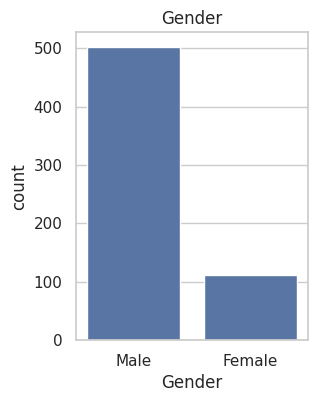

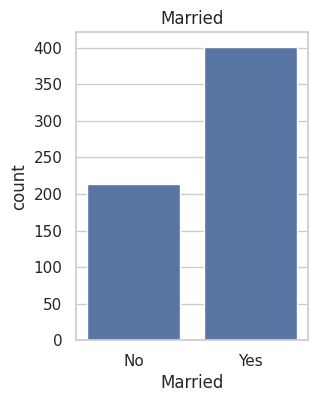

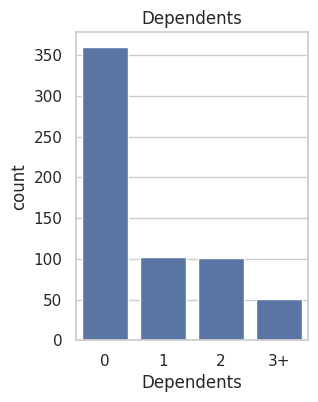

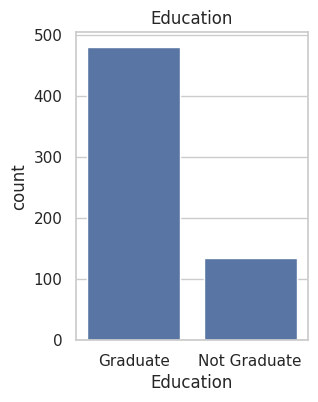

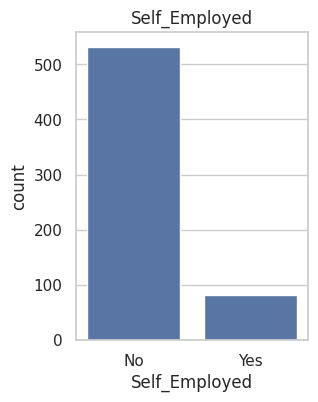

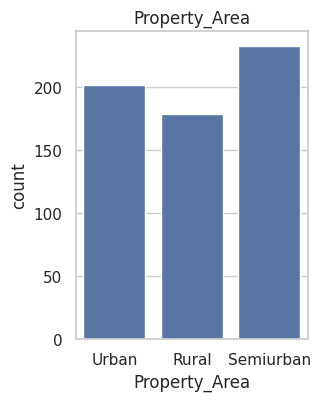

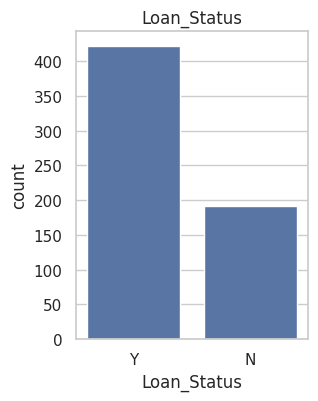

In [15]:
for col in loan_cat:
    plt.figure(figsize=(3,4))
    sns.set(style="whitegrid")
    sns.countplot(x = df[col]) 
    plt.title(col)
    plt.show()

> ## Explore Numeric Columns

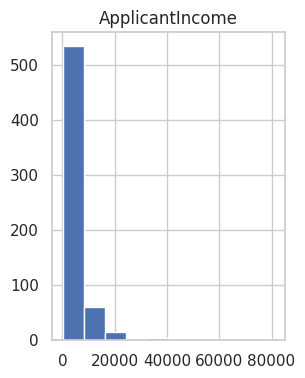

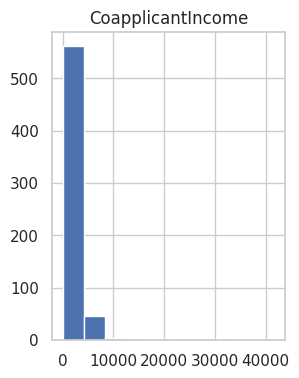

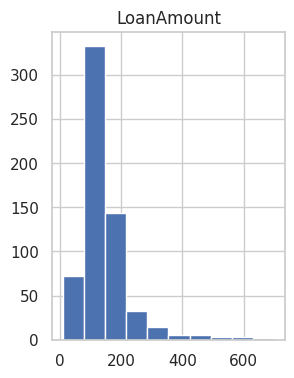

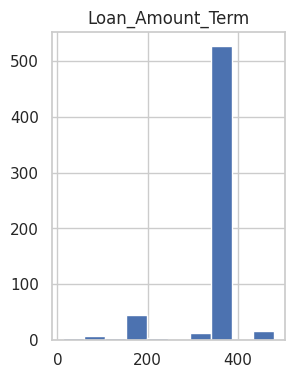

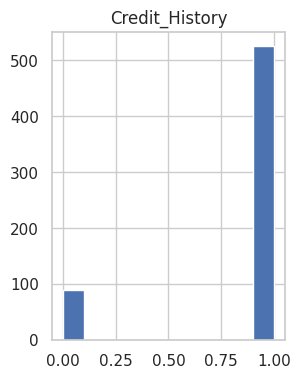

In [16]:
for col in loan_num:
    plt.figure(figsize=(3,4))
    sns.set(style="whitegrid")
    plt.hist(loan_num[col]) 
    plt.title(col)
    plt.show()

> ## Categorical (split by Loan status)



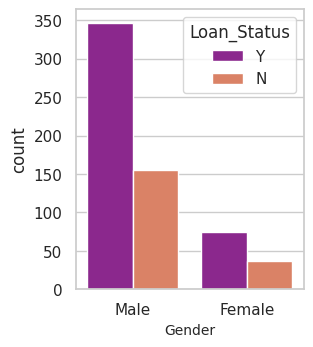

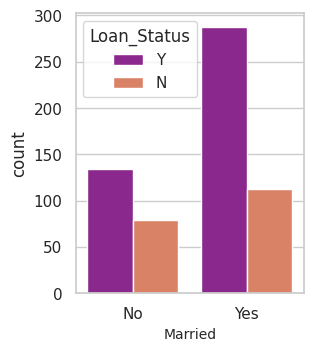

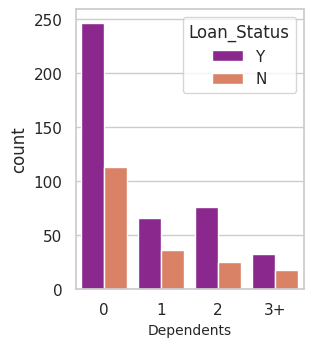

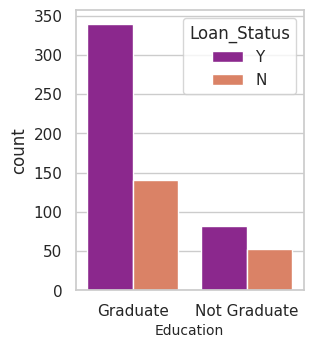

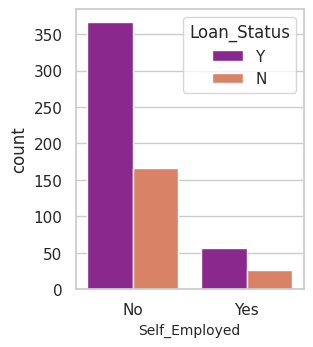

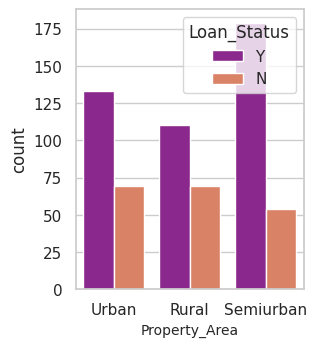

In [17]:
for col in cat[:-1]:
    plt.figure(figsize = (10,8))
    plt.subplot(2,3,1)
    sns.countplot(x = col, hue = 'Loan_Status', data=df, palette='plasma')
    plt.xlabel(col, fontsize=10)

> ## Bivariate Analysis

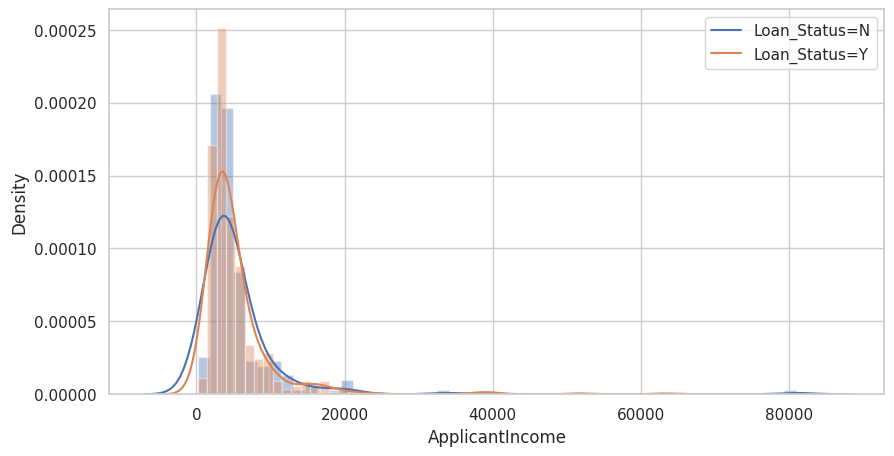

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['ApplicantIncome'][df.Loan_Status=='N'])
sns.distplot(df['ApplicantIncome'][df.Loan_Status=='Y'])
plt.legend(['Loan_Status=N','Loan_Status=Y'])
plt.show()

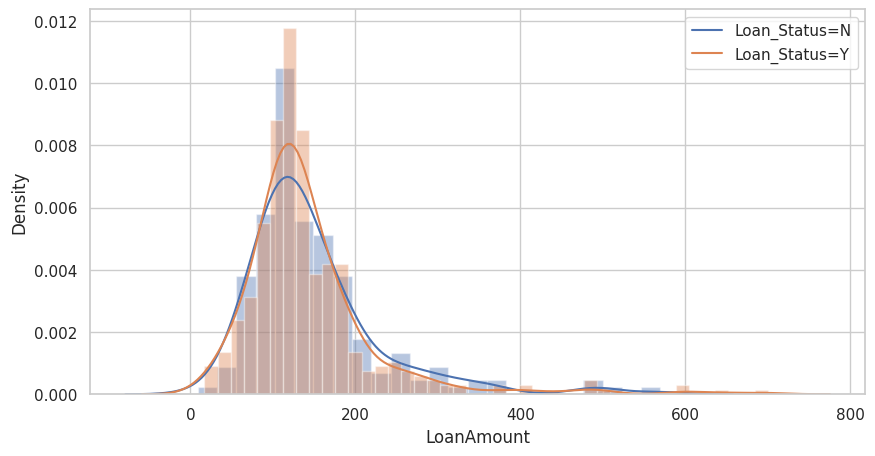

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df['LoanAmount'][df.Loan_Status=='N'])
sns.distplot(df['LoanAmount'][df.Loan_Status=='Y'])
plt.legend(['Loan_Status=N','Loan_Status=Y'])
plt.show()

> ## Encoding data to numeric

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [21]:
to_numeric = {'Male' : 1, 'Female': 2, 
             'Yes': 1, 'No':2,
             'Graduate': 1, 'Not Graduate' : 2,
             'Urban' : 1,'Semiurban': 2,'Rural': 3,
             'Y': 1, 'N': 0,
             '3+': 3}

new_df= df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


In [22]:
new_df.Dependents = pd.to_numeric(new_df.Dependents)

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


## Correlation matrix


<Axes: >

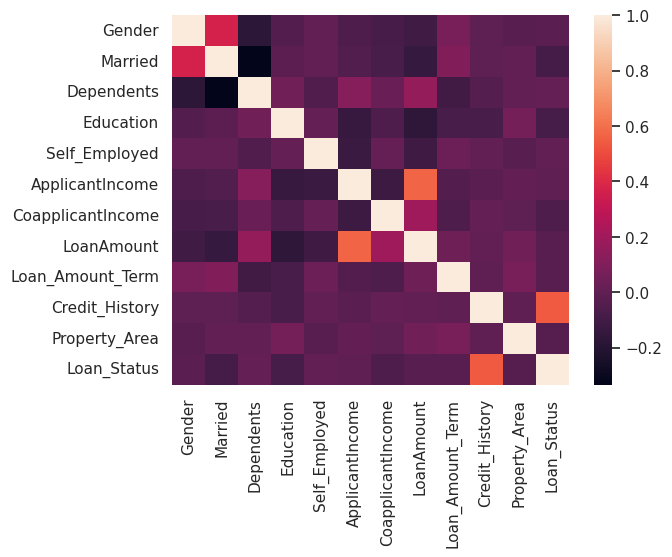

In [24]:
sns.heatmap(new_df.corr())

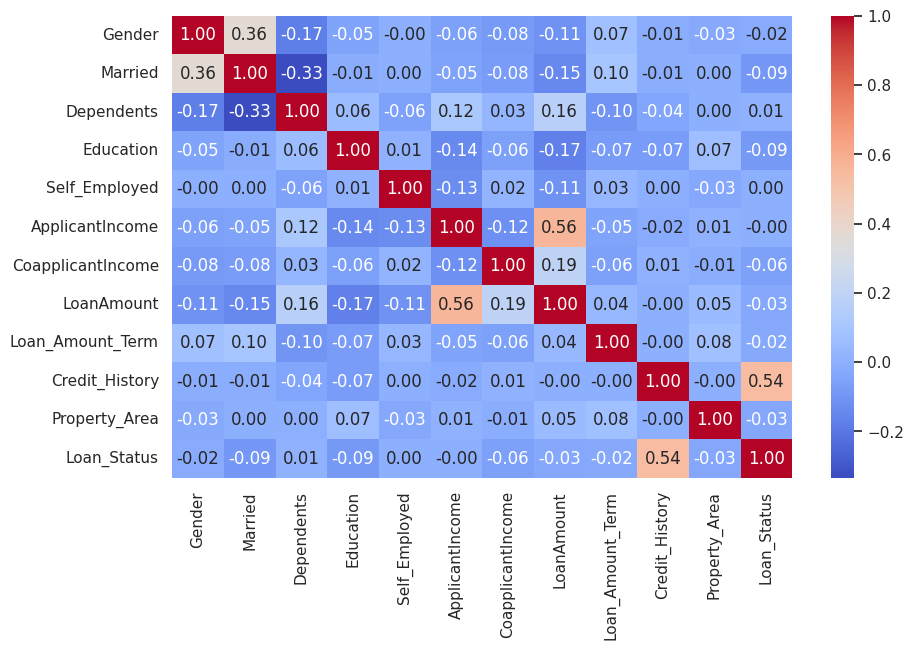

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(new_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [26]:
# correlation table
# corr = df.corr()
#  plt.figure(figsize = (10,6))
# corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")

As we can clearly see that **Credit_History** has the highest correlation with Loan_Status **(a positive correlation of 0.54)**. Therefore our target value is highly dependent on this column.

> # **Machine learning models**
First of all we will divide our dataset into two variables **X as the features** we defined earlier and **y as the Loan_Status** the target value we want to predict.

### Models we will use:
* Decision Tree
* Random Forest
* XGBoost
* Logistic Regression

### The Process of Modeling the Data:
1. Importing the model
2. Fitting the model
3. Predicting Loan Status
4. Classification report by Loan Status
5. Overall accuracy

In [27]:
y = new_df['Loan_Status']
X = new_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 11)
(185, 11)
(429,)
(185,)


> ## Decision Tree

In [29]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

print(classification_report(y_test, y_predict))

DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accuarte")
# print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        51
           1       0.80      0.76      0.78       134

    accuracy                           0.69       185
   macro avg       0.63      0.64      0.63       185
weighted avg       0.71      0.69      0.70       185

69.19% Accuarte


Text(0.5, 1.0, 'Output Confusion Matrix')

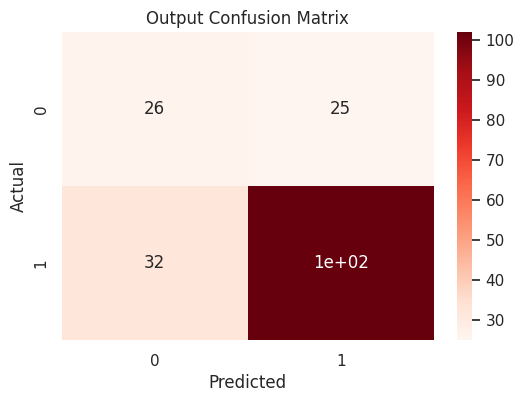

In [30]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [31]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Decision Tree.csv") 

In [32]:
original_y = {1: 'Y', 0: 'N'}

y_pred_label = pd.Series(y_predict).map(original_y)

df['Decision_Tree_Prediction'] = pd.Series(y_pred_label)

> ## Random Forest

In [33]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

print(classification_report(y_test, y_predict))

RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")


              precision    recall  f1-score   support

           0       0.75      0.41      0.53        51
           1       0.81      0.95      0.87       134

    accuracy                           0.80       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.79      0.80      0.78       185

80.0% Accurate


Text(0.5, 1.0, 'Output Confusion Matrix')

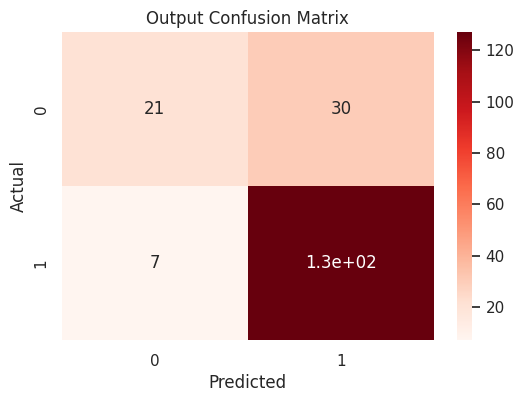

In [34]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [35]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv") 

In [36]:
original_y = {1: 'Y', 0: 'N'}

y_pred_label = pd.Series(y_predict).map(original_y)

df['Random_Forest_Prediction'] = pd.Series(y_pred_label)

> ##   XGBoost

In [37]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.73      0.53      0.61        51
           1       0.84      0.93      0.88       134

    accuracy                           0.82       185
   macro avg       0.78      0.73      0.75       185
weighted avg       0.81      0.82      0.81       185

81.62% Accurate


Text(0.5, 1.0, 'Output Confusion Matrix')

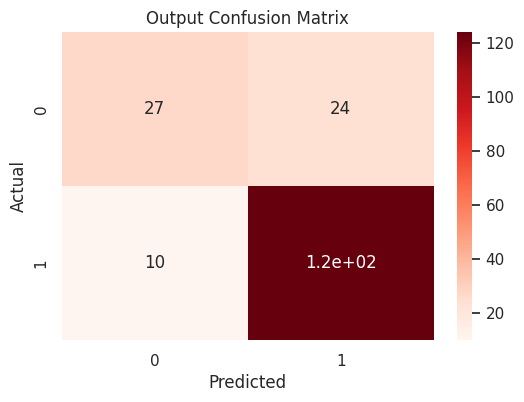

In [38]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [39]:
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv") 

In [40]:
original_y = {1: 'Y', 0: 'N'}

y_pred_label = pd.Series(y_predict).map(original_y)

df['XGBoost_Prediction'] = pd.Series(y_pred_label)

> ##  Logistic Regression

In [41]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',round(accuracy_score(y_predict,y_test)*100,2),"%")

              precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

accuracy is 82.7 %


Text(0.5, 1.0, 'Output Confusion Matrix')

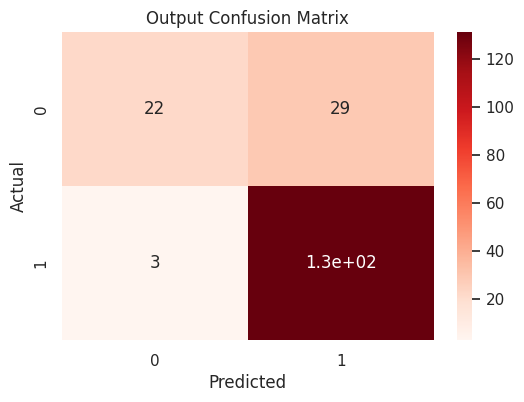

In [42]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [43]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv") 

In [44]:
original_y = {1: 'Y', 0: 'N'}

y_pred_label = pd.Series(y_predict).map(original_y)

df['Logistic_Regression_Prediction'] = pd.Series(y_pred_label)

### **Conclusion** - The Logistic Regression algorithm is the most accurate with approximately **83% of accuracy**.

In [45]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.827027
2,XGBoost,0.816216
1,Random Forest,0.800000
0,Decision Tree,0.691892


> ## Original Dataframe to compare results of all algorithms

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Decision_Tree_Prediction,Random_Forest_Prediction,XGBoost_Prediction,Logistic_Regression_Prediction
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,N,Y,Y,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Y,Y,Y,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Y,Y,Y,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,N,Y,N,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Y,Y,Y,Y


In [47]:
df.to_csv("final_predictions.csv", index=False)